In [48]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"C:/Users/Admin/data/winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

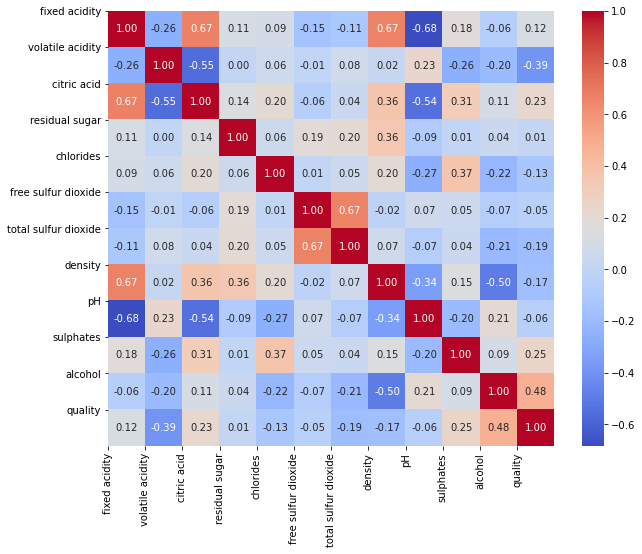

In [113]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


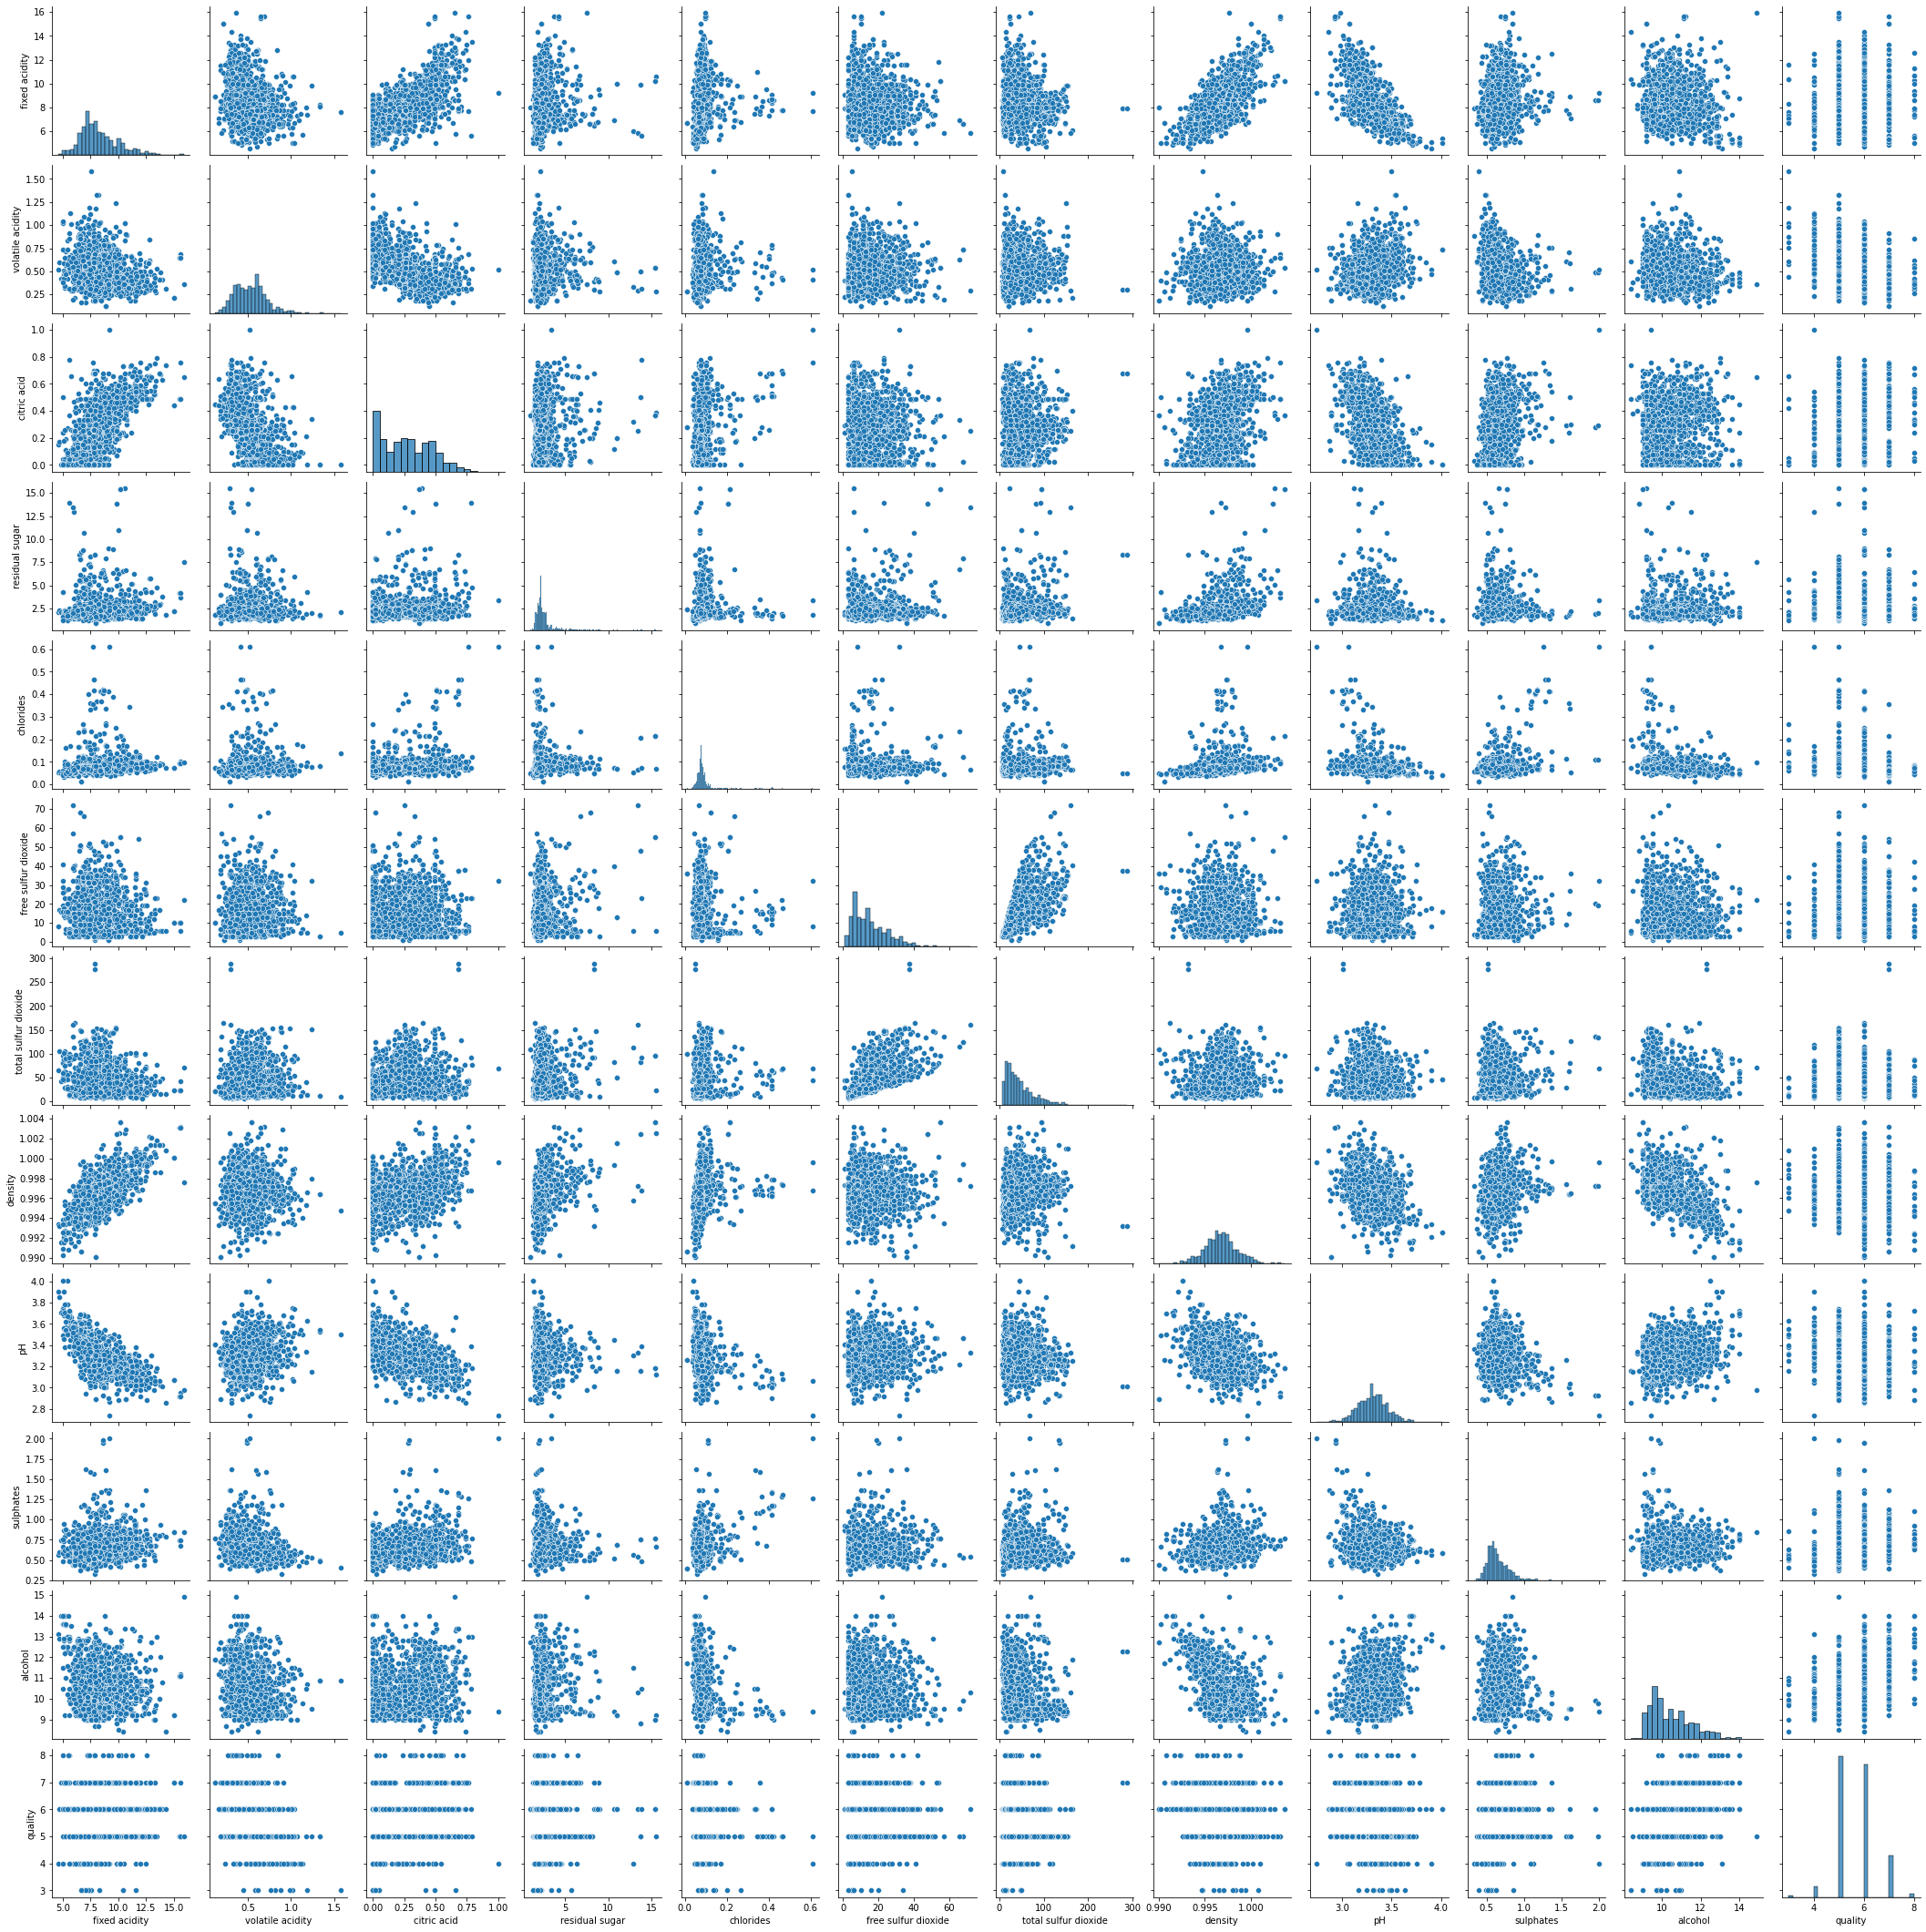

In [59]:
sns.pairplot(data)

In [184]:
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [185]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [186]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [187]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [188]:
X = data.drop(['quality'], axis = 1)
Y = data['quality']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=42)

In [162]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [163]:
pred = model.predict(X_validation)

In [164]:
print('MAE:', metrics.mean_absolute_error(Y_validation, pred))
print('MSE:', metrics.mean_squared_error(Y_validation, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, pred)))
print('R-Squared: ',model.score(X_train,Y_train))

MAE: 0.4978936262260413
MSE: 0.3769116907179907
RMSE: 0.613931340394014
R-Squared:  0.4586896975158594


NameError: name 'pyplot' is not defined

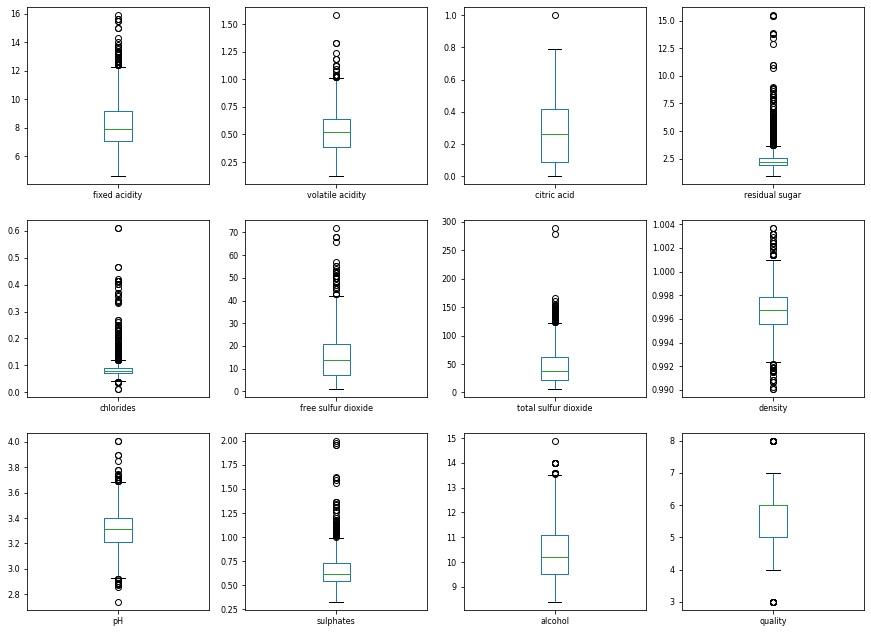

In [49]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

In [50]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
under = Q1 - 1.5 * IQR
over = Q3 + 1.5 * IQR

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


NameError: name 'pyplot' is not defined

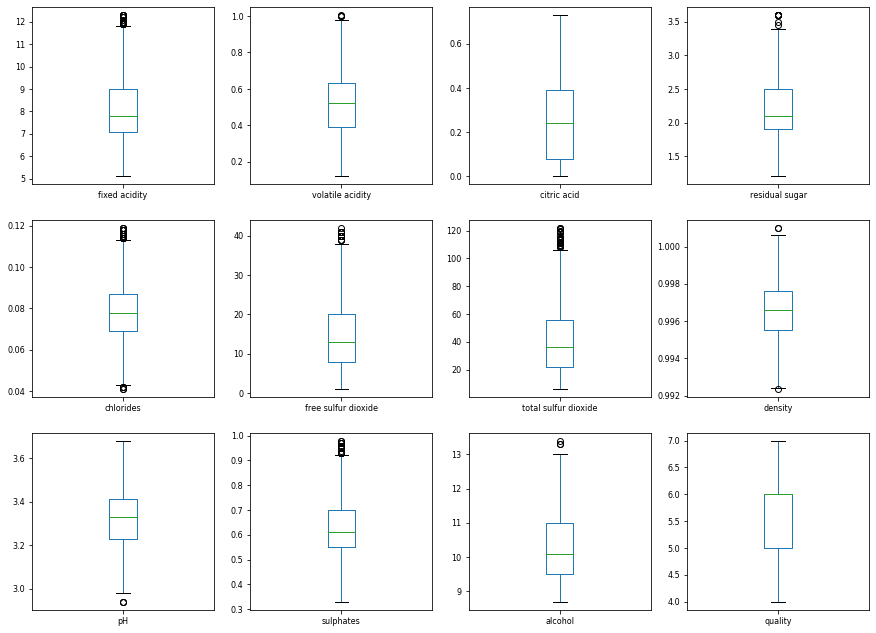

In [127]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

In [189]:
X = data.drop(['quality'], axis = 1)
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [190]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

In [191]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [198]:
pred_lr = model.predict(X_test_scaled)

In [199]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('R-Squared: ',model.score(x_train,y_train))

MAE: 0.49781964869612466
MSE: 0.40385561904892847
RMSE: 0.6354963564403249
R-Squared:  -15.351210280427651


In [200]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [201]:
pred_knn = neigh.predict(X_test_scaled)

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))
print('R-Squared: ',model.score(x_train,y_train))

MAE: 0.5104166666666666
MSE: 0.6395833333333333
RMSE: 0.7997395409340051
R-Squared:  -15.351210280427651


In [209]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(sc, SVC(gamma='auto'))
clf.fit(X_train_scaled, y_train)
pred_SVC = clf.predict(X_test_scaled)

In [210]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_SVC))
print('MSE:', metrics.mean_squared_error(y_test, pred_SVC))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_SVC)))
print('R-Squared: ',model.score(x_train,y_train))

MAE: 0.4166666666666667
MSE: 0.4666666666666667
RMSE: 0.6831300510639732
R-Squared:  -15.351210280427651


In [361]:
cars = pd.read_csv(r'C:/Users/Admin/data/CarPrice_Assignment.csv')
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [276]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [277]:
cars.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [362]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [363]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [76]:
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

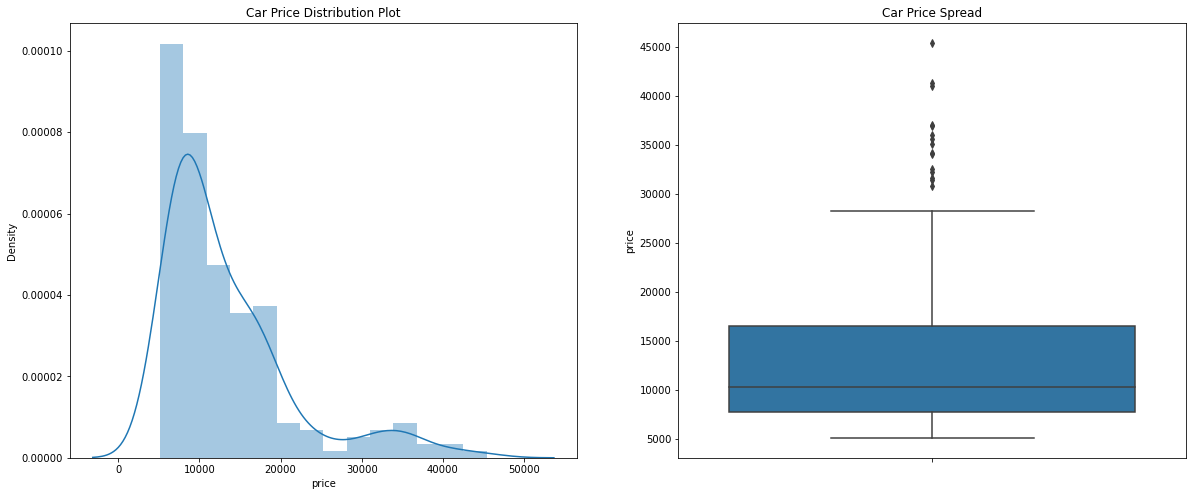

In [59]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [77]:
print(cars.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


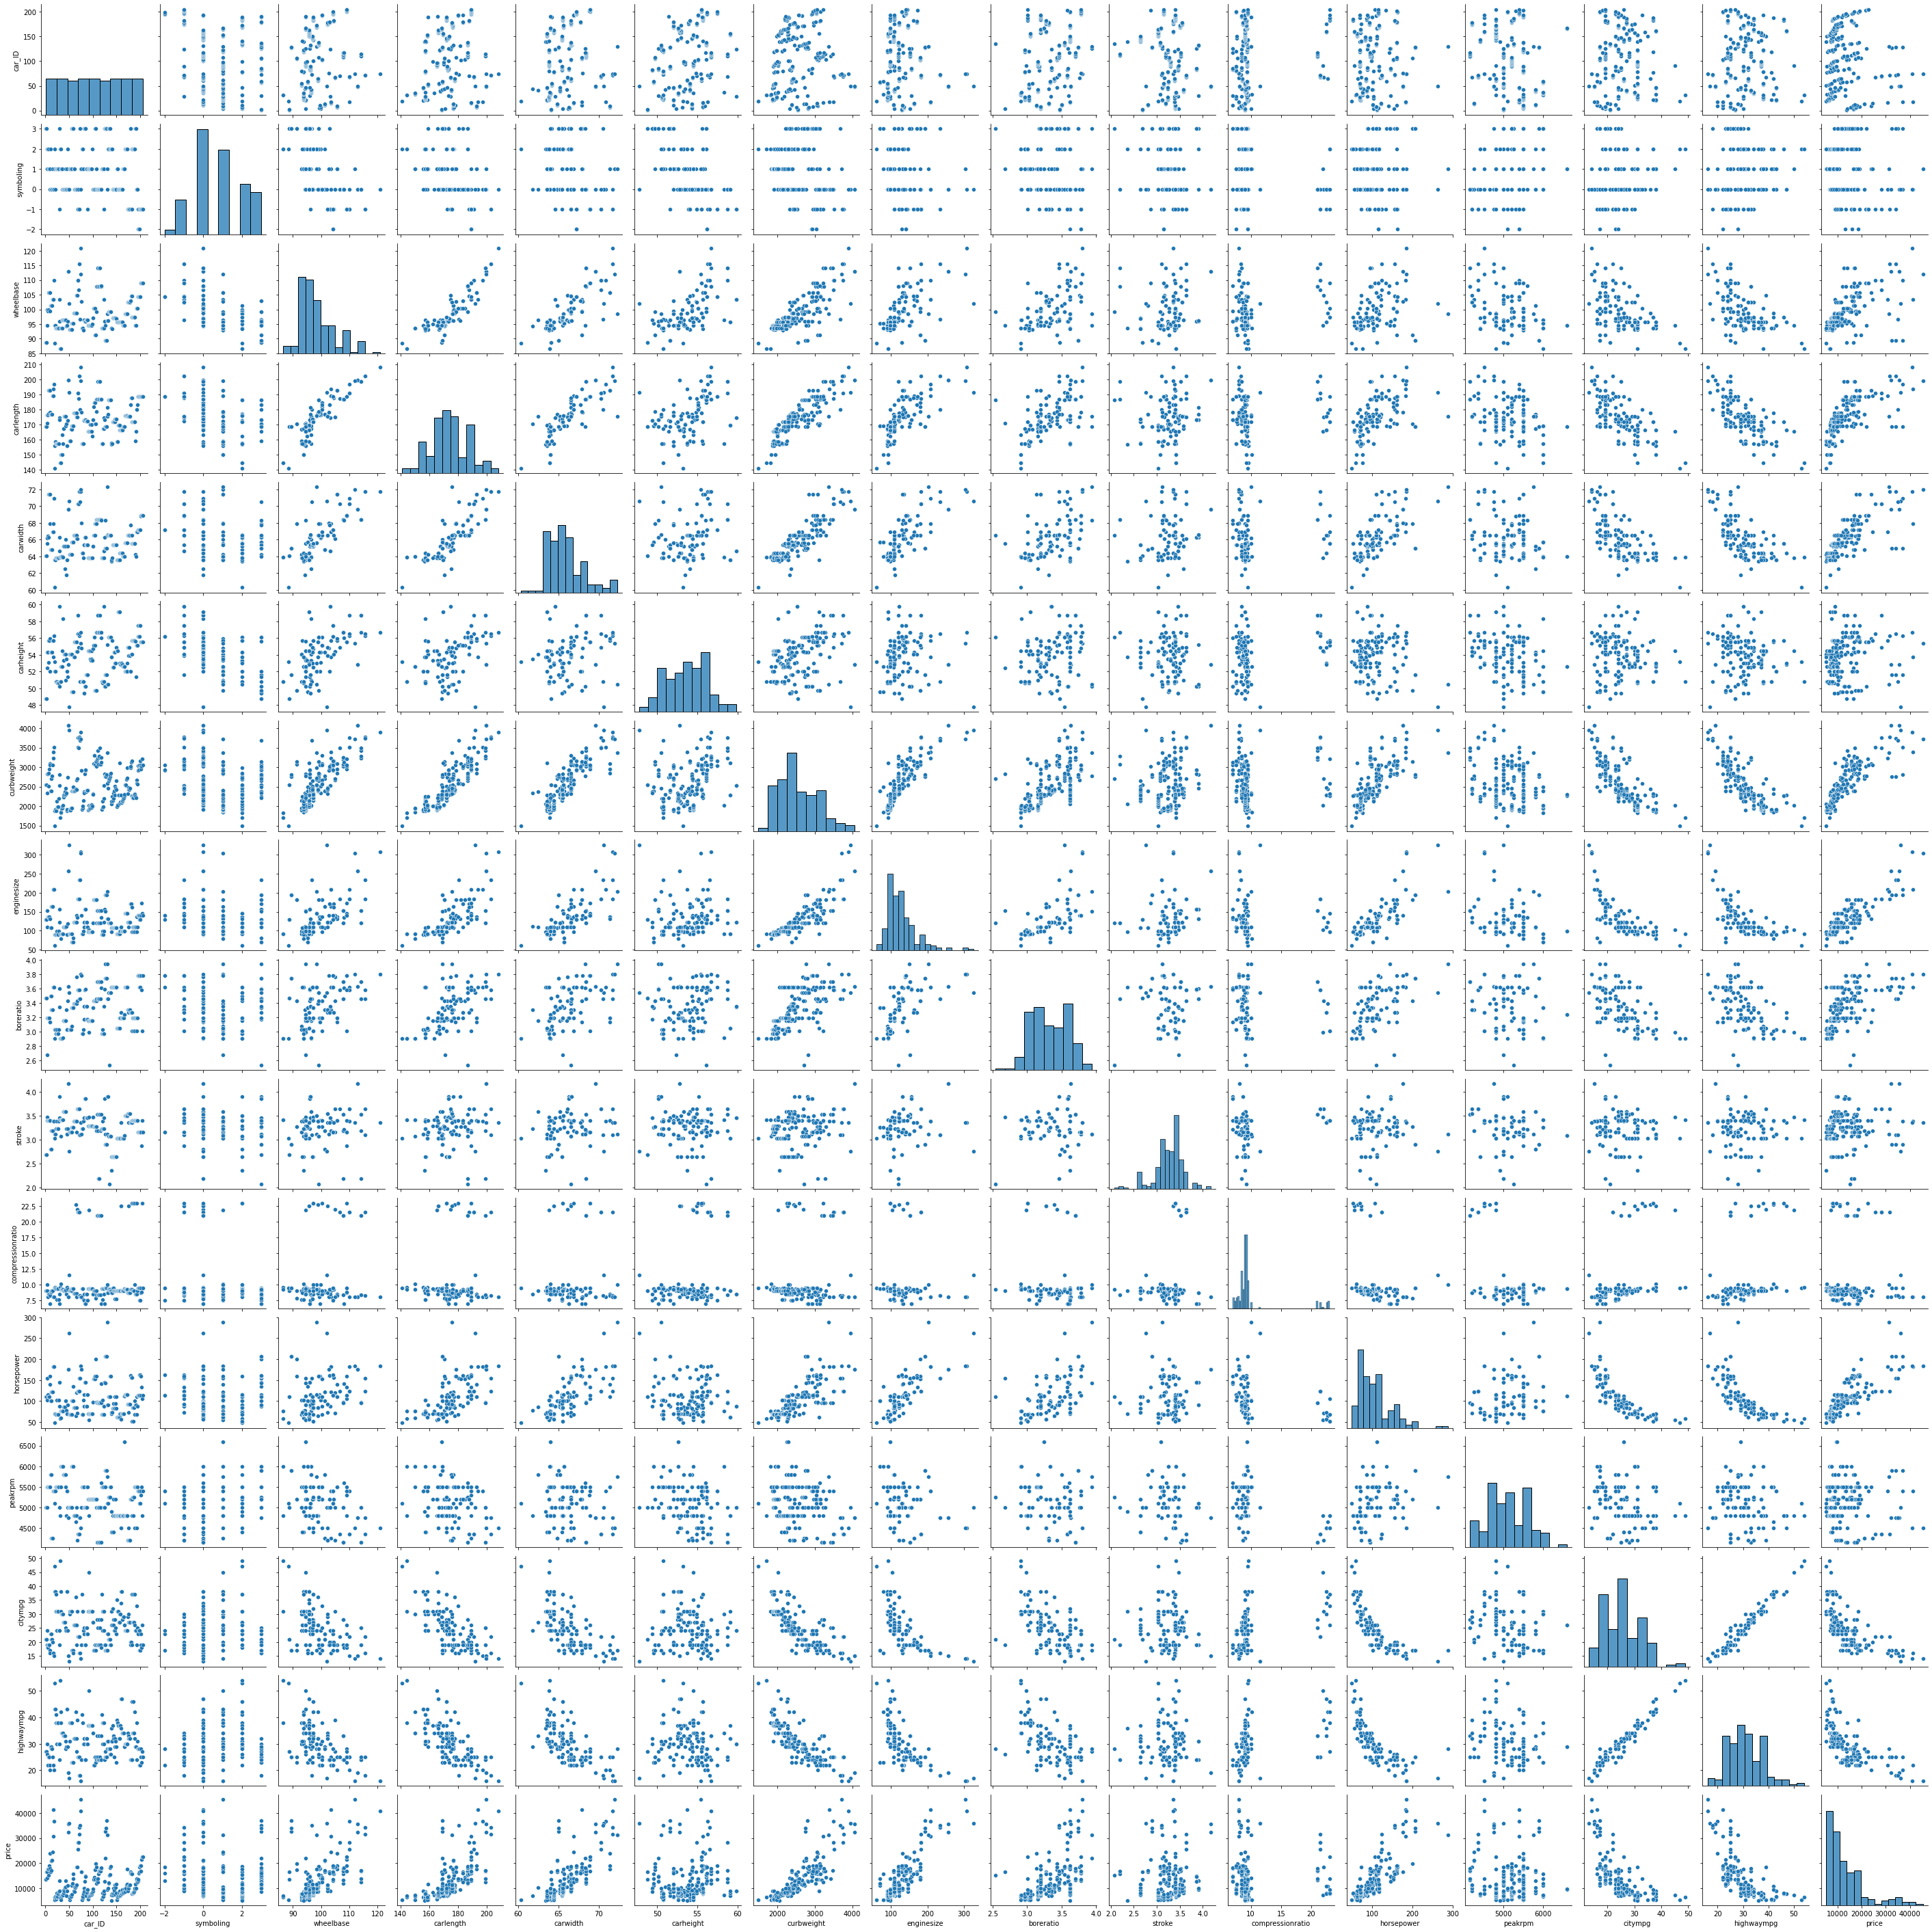

In [78]:
sns.pairplot(cars)

In [364]:
cars['fueleconomy'] = (0.60 * cars['citympg']) + (0.40 * cars['highwaympg'])

cars["brand_category"] = cars['price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else ("Luxury")))

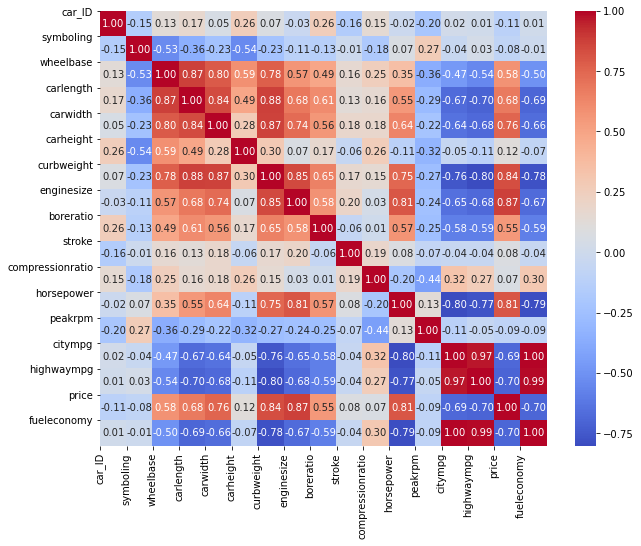

In [80]:
corr = cars.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

NameError: name 'pyplot' is not defined

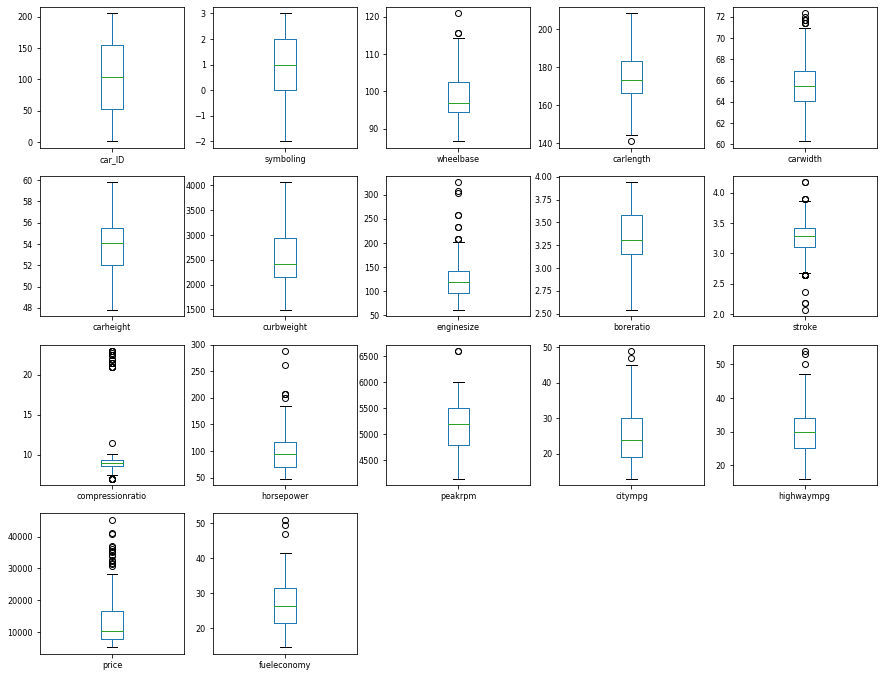

In [83]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
cars.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

In [85]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
under = Q1 - 1.5 * IQR
over = Q3 + 1.5 * IQR

cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]

NameError: name 'pyplot' is not defined

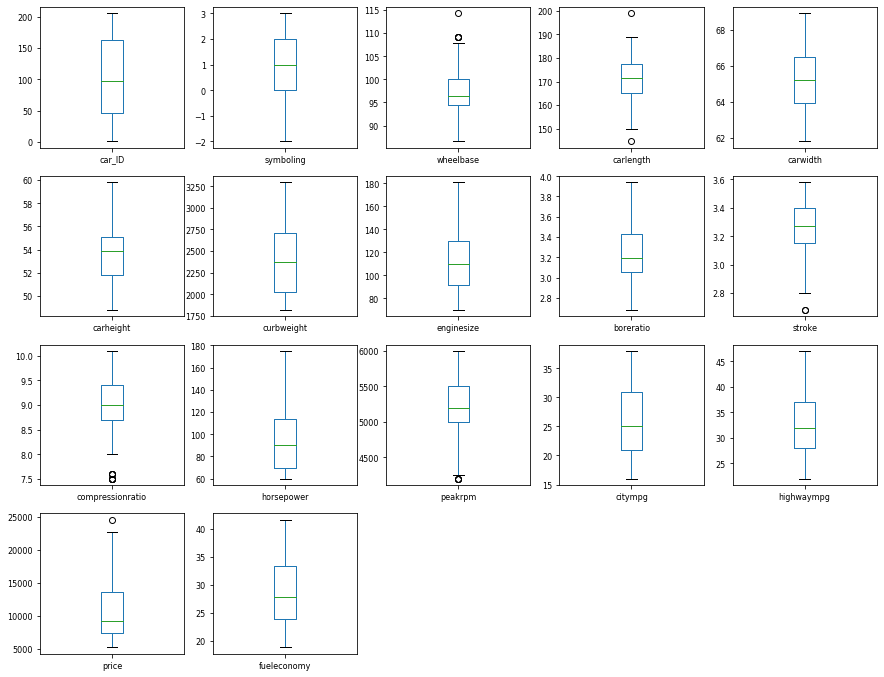

In [86]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
cars.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

In [365]:
cars = cars.drop(["highwaympg"], axis = 1)
cars = cars.drop(["citympg"], axis = 1)
cars = cars.drop(["car_ID"], axis = 1)
cars = cars.drop(["doornumber"], axis = 1)
cars = cars.drop(["cylindernumber"], axis = 1)
cars = cars.drop(["enginelocation"], axis = 1)

In [366]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [367]:
cars = dummies('CompanyName',cars)
cars = dummies('fueltype',cars)
cars = dummies('fuelsystem',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('brand_category',cars)

In [368]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 42)

In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['symboling','wheelbase', 'curbweight', 'enginesize', 'boreratio','stroke','compressionratio','peakrpm', 'horsepower','fueleconomy','carlength','carwidth','carheight','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

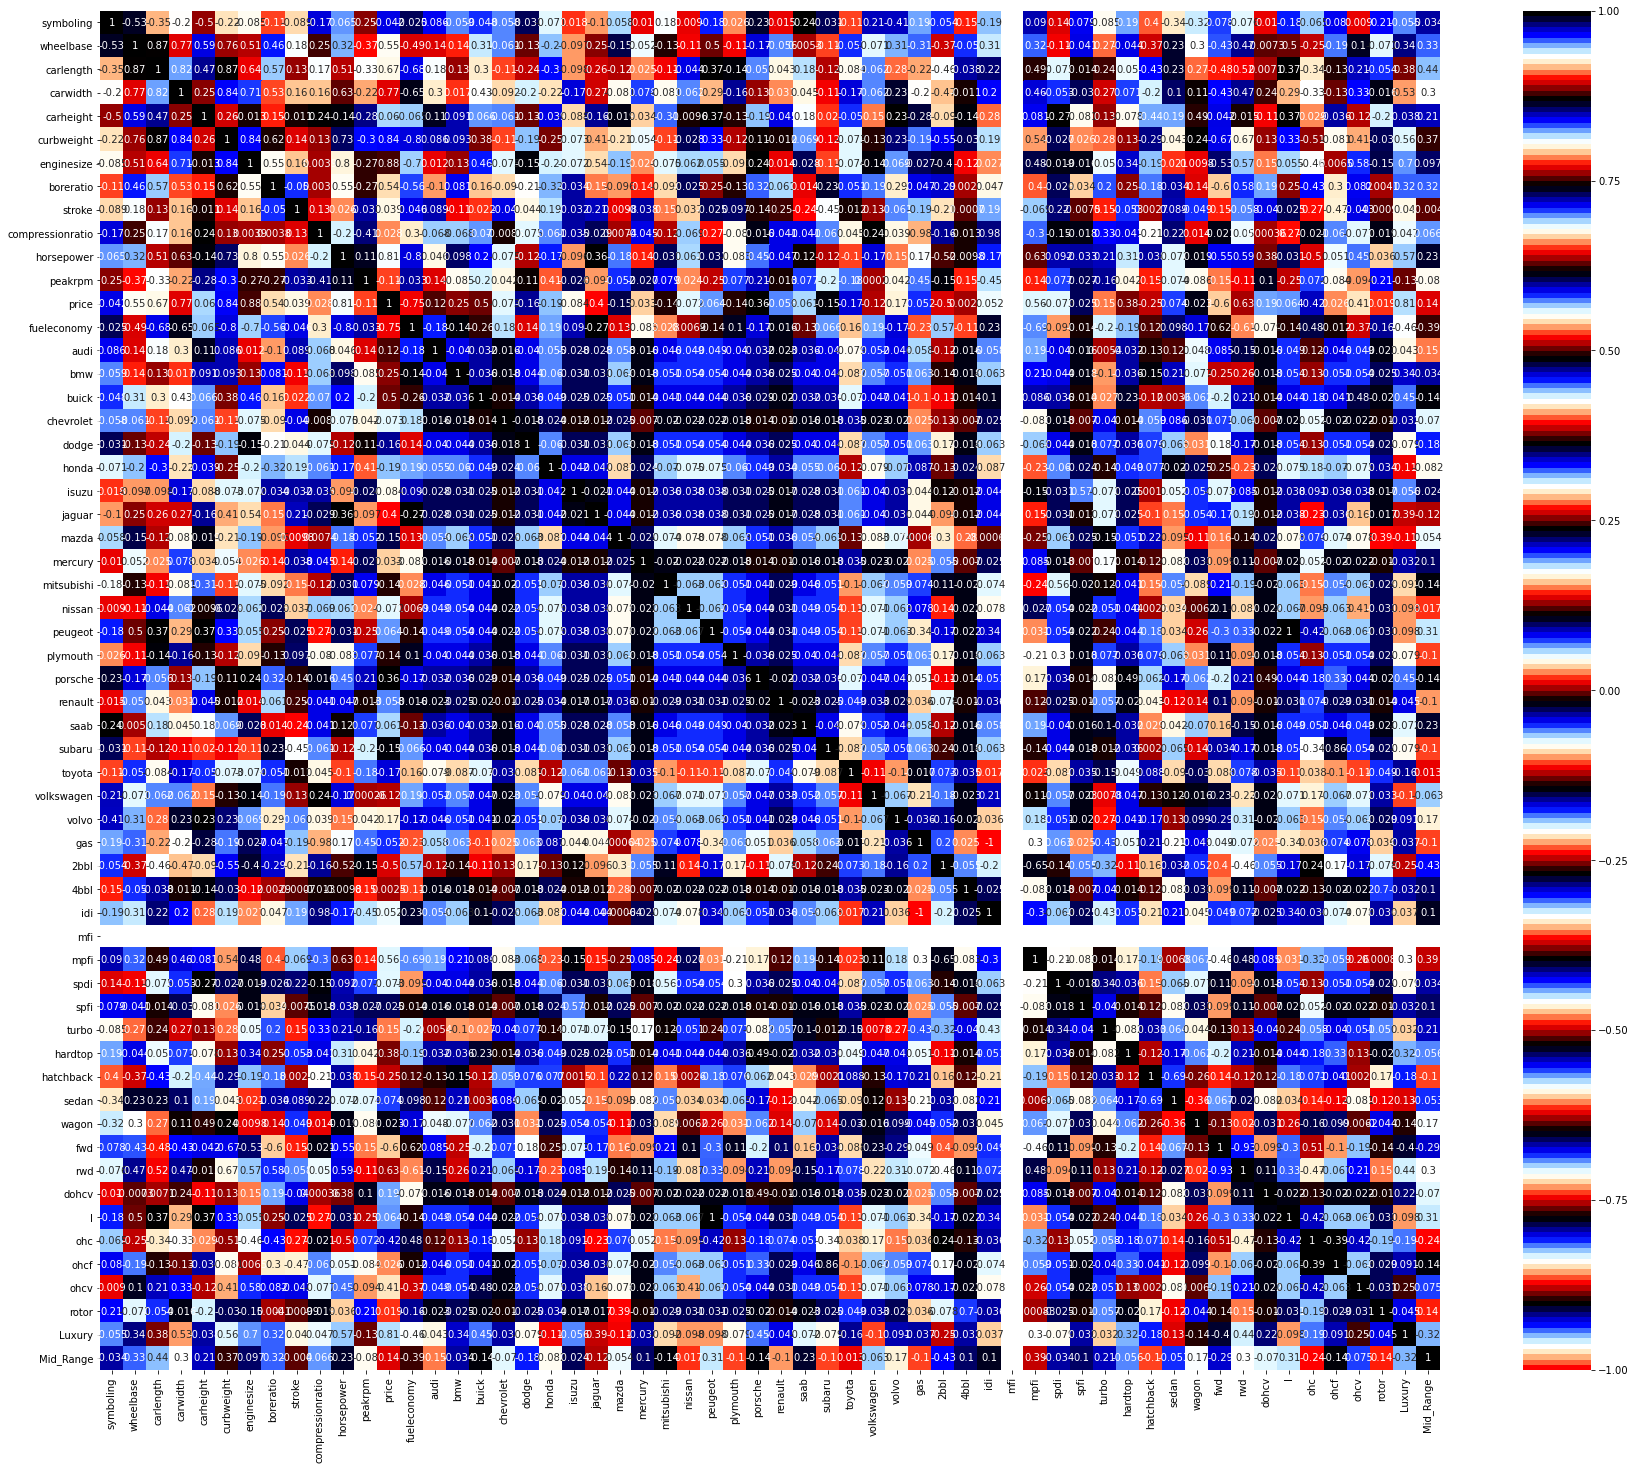

In [370]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="flag")
plt.show()

In [371]:
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [372]:
from sklearn.linear_model import LinearRegression

In [373]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [374]:
pred_lr = lm.predict(X_test)

In [375]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('R-Squared: ',lm.score(X_train,y_train))

MAE: 0.06968804512009576
MSE: 0.007429450421839619
RMSE: 0.08619425979634386
R-Squared:  0.979418246756767


In [380]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
cars['price'] = lab_enc.fit_transform(cars['price'])
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 42)

In [381]:
Y_train = df_train.pop('price')
x_train = df_train
Y_test = df_test.pop('price')
x_test = df_test

In [382]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train, Y_train)

KNeighborsClassifier()

In [385]:
pred_knn = neigh.predict(x_test)

In [387]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_knn))
print('MSE:', metrics.mean_squared_error(Y_test, pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_knn)))
print('R-Squared: ',lm.score(x_train,Y_train))

MAE: 26.370967741935484
MSE: 1069.274193548387
RMSE: 32.699758310244235
R-Squared:  -287.7358944443809


In [388]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(scaler, SVC(gamma='auto'))
clf.fit(x_train, Y_train)
pred_SVC = clf.predict(x_test)

In [389]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_SVC))
print('MSE:', metrics.mean_squared_error(Y_test, pred_SVC))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_SVC)))
print('R-Squared: ',lm.score(x_train,Y_train))

MAE: 35.774193548387096
MSE: 2064.1935483870966
RMSE: 45.43339683962775
R-Squared:  -287.7358944443809


0      118
1      137
2      137
3      123
4      148
      ... 
200    143
201    161
202    165
203    167
204    168
Name: price, Length: 205, dtype: int64